<a href="https://colab.research.google.com/github/papagorgio23/Python101/blob/master/Py_202_F%2B_Lead_Scoring_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# instal Library
!pip install pydata_google_auth

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# F+ Lead Scoring Model

![NPV Model](https://raw.githubusercontent.com/papagorgio23/Python101/master/NPV%20Model.png)

## Get Data

In [ ]:
# Using GBQ shout Out to Hughes
import pandas_gbq
import pydata_google_auth

SCOPES = [
    'https://www.googleapis.com/auth/cloud-platform',
    'https://www.googleapis.com/auth/drive',
]

# get credentials
credentials = pydata_google_auth.get_user_credentials(
    SCOPES,
    auth_local_webserver=False)

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=262006177488-3425ks60hkk80fssi9vpohv88g6q1iqd.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&state=ct4Rnjck5BueT5eUEgbGLKGpK0jmLr&prompt=consent&access_type=offline
Enter the authorization code: 4/sgHoDePlKGfaOyv5ml-Aldv8xiGrofPFQgxTze28FWiZs0LUhheWLrs


In [ ]:
# GBQ
sql = """
SELECT 
  id
, co_app_verifiable_annual_income__c
, loan_use__c
, employment_status__c
, amount_of_loan_requested__c
, fico__c
, lti__c
, bcc0300__c
, ndi_ratio__c
, utm_source__c
, CASE WHEN date_funded__c IS NOT NULL THEN 1 ELSE 0 END AS Fund

FROM `freedom-dw.salesforce_ffam.application__c` a 

WHERE createddate BETWEEN '2019-05-01' AND '2019-09-01'
AND a.loan_officer__c  IS NOT NULL
"""

In [ ]:
# run query
fplus_df = pandas_gbq.read_gbq(sql, project_id='ffn-dw-bigquery-prd', credentials=credentials, dialect='standard')

## View Data

In [ ]:
# view top 5 observations
fplus_df.head()

,id,co_app_verifiable_annual_income__c,loan_use__c,employment_status__c,amount_of_loan_requested__c,fico__c,lti__c,bcc0300__c,ndi_ratio__c,utm_source__c,Fund
0,a010f00000WjwU3AAJ,NaN,Debt Consolidation,Full-time,28000.0,783.0,28.6,24.0,46.161696,Lending Tree,0
1,a010f00000WsAf6AAF,NaN,Credit Card Refinancing,Full-time,28000.0,714.0,14.3,21.0,29.100000,save,0
2,a010f00000WsPnjAAF,NaN,Debt Consolidation,Full-time,14000.0,667.0,26.4,21.0,40.200000,Lending Tree,0
3,a010f00000TD0qqAAD,NaN,Home Improvement,Full-time,15000.0,850.0,25.0,22.0,71.900000,Lending Tree,0
4,a010f00000WrLBZAA3,NaN,Debt Consolidation,Full-time,21500.0,669.0,17.2,22.0,49.700000,Lending Tree,0


In [ ]:
# view bottom 5 observations
fplus_df.tail()

,id,co_app_verifiable_annual_income__c,loan_use__c,employment_status__c,amount_of_loan_requested__c,fico__c,lti__c,bcc0300__c,ndi_ratio__c,utm_source__c,Fund
238204,a010f00000WSbpfAAD,NaN,Debt Consolidation,Full-time,23000.0,654.0,34.9,1.0,61.000000,monevo,0
238205,a010f00000Wj4HmAAJ,NaN,Debt Consolidation,Full-time,10000.0,643.0,33.3,1.0,76.592975,FDR,0
238206,a010f00000WsEOxAAN,NaN,Credit Card Refinancing,Full-time,33000.0,722.0,6.1,1.0,4.700000,Lending Tree,0
238207,a010f00000YPZXWAA5,NaN,Other,Full-time,19999.0,760.0,16.0,1.0,17.000000,organic,1
238208,a010f00000Y39siAAB,NaN,Debt Consolidation,Full-time,20000.0,689.0,32.3,1.0,50.199656,Quinstreet,0


In [ ]:
# view columns, data types
fplus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238209 entries, 0 to 238208
Data columns (total 11 columns):
id                                    238209 non-null object
co_app_verifiable_annual_income__c    50012 non-null float64
loan_use__c                           237103 non-null object
employment_status__c                  236954 non-null object
amount_of_loan_requested__c           237507 non-null float64
fico__c                               233640 non-null float64
lti__c                                235974 non-null float64
bcc0300__c                            233640 non-null float64
ndi_ratio__c                          233570 non-null float64
utm_source__c                         238209 non-null object
Fund                                  238209 non-null int64
dtypes: float64(6), int64(1), object(4)
memory usage: 20.0+ MB


In [ ]:
# get summary statistics
fplus_df.describe()

,co_app_verifiable_annual_income__c,amount_of_loan_requested__c,fico__c,lti__c,bcc0300__c,ndi_ratio__c,Fund
count,5.001200e+04,237507.000000,233640.000000,235974.000000,233640.000000,233570.000000,238209.000000
mean,1.097593e+05,21847.718153,715.257263,21.779849,7.517741,39.544543,0.101671
std,5.325666e+06,11718.577449,176.196347,134.979170,5.287251,17.936461,0.302216
min,-2.029000e+03,0.000000,423.000000,0.000000,0.000000,0.000000,0.000000
25%,3.450000e+04,12500.000000,675.000000,14.400000,4.000000,28.900000,0.000000
50%,5.200000e+04,19000.000000,707.000000,20.000000,6.000000,37.800000,0.000000
75%,7.660200e+04,29500.000000,745.000000,27.600000,10.000000,48.500000,0.000000
max,8.441380e+08,500000.000000,9003.000000,55555.600000,99.000000,1711.700000,1.000000


In [ ]:
# check NA
fplus_df.isna().sum()

id                                         0
co_app_verifiable_annual_income__c    188197
loan_use__c                             1106
employment_status__c                    1255
amount_of_loan_requested__c              702
fico__c                                 4569
lti__c                                  2235
bcc0300__c                              4569
ndi_ratio__c                            4639
utm_source__c                              0
Fund                                       0
dtype: int64

## Histogram for all Variables

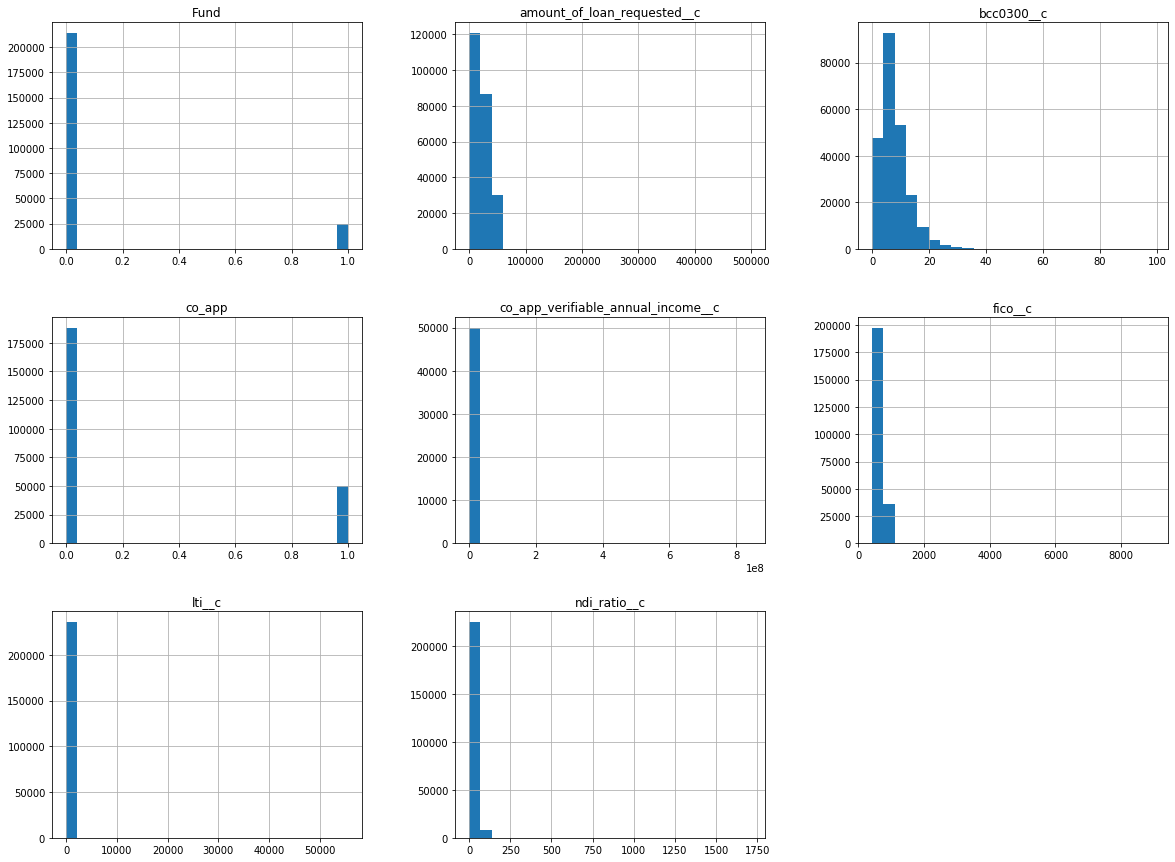

In [ ]:
# histograms of professional preference
fplus_df.hist(bins=25, figsize=(20,15))
plt.show()

# Investigate Variables

## 1) - Co App

We only care if an application has a Co App with them. We are using co_app_verifiable_annual_income__c to let us know if they have one. 

<br>

*   If NA then No Co App
*   If Not NA then Co App

<br>

### View data

In [ ]:
# create a new dataframe for co_apps and drop any NAs for co app
co_apps = fplus_df.dropna(subset=['co_app_verifiable_annual_income__c'])

In [ ]:
# view columns, data types
co_apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50012 entries, 6 to 238199
Data columns (total 11 columns):
id                                    50012 non-null object
co_app_verifiable_annual_income__c    50012 non-null float64
loan_use__c                           49978 non-null object
employment_status__c                  50009 non-null object
amount_of_loan_requested__c           50009 non-null float64
fico__c                               49472 non-null float64
lti__c                                49826 non-null float64
bcc0300__c                            49472 non-null float64
ndi_ratio__c                          49415 non-null float64
utm_source__c                         50012 non-null object
Fund                                  50012 non-null int64
dtypes: float64(6), int64(1), object(4)
memory usage: 4.6+ MB


In [ ]:
# get summary stats on co_app
co_apps['co_app_verifiable_annual_income__c'].describe()

count    5.001200e+04
mean     1.097593e+05
std      5.325666e+06
min     -2.029000e+03
25%      3.450000e+04
50%      5.200000e+04
75%      7.660200e+04
max      8.441380e+08
Name: co_app_verifiable_annual_income__c, dtype: float64

### Plot

[Text(0.5, 0, '')]

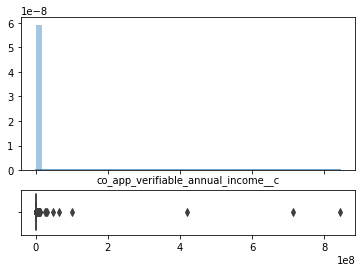

In [ ]:
# Cut the window in 2 parts
f, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.85, .25)})

# Add a boxplot ax
sns.boxplot(co_apps['co_app_verifiable_annual_income__c'], ax=ax_box)
# Add a distplot ax
sns.distplot(co_apps['co_app_verifiable_annual_income__c'], ax=ax_hist)

# Remove x axis name for the boxplot
ax_box.set(xlabel='')

### Remove outliers

In [ ]:
## remove outlier...
co_apps = co_apps[co_apps['co_app_verifiable_annual_income__c'] < 1000000]

[Text(0.5, 0, '')]

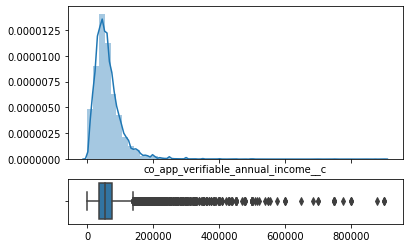

In [ ]:
# replot
# Cut the window in 2 parts
f, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.85, .25)})

# Add a boxplot ax
sns.boxplot(co_apps['co_app_verifiable_annual_income__c'], ax=ax_box)
# Add a distplot ax
sns.distplot(co_apps['co_app_verifiable_annual_income__c'], ax=ax_hist)

# Remove x axis name for the boxplot
ax_box.set(xlabel='')

In [ ]:
# create function to make a Co-App Flag
def co_app(co_app_income):
    if pd.isnull(co_app_income):
        return 0
    return 1

In [ ]:
# apply function to dataset
fplus_df['co_app'] = fplus_df['co_app_verifiable_annual_income__c'].apply(co_app)

In [ ]:
# view counts now
fplus_df['co_app'].value_counts()

0    188197
1     50012
Name: co_app, dtype: int64

In [ ]:
# view percentage
fplus_df['co_app'].value_counts()/len(fplus_df)

0    0.79005
1    0.20995
Name: co_app, dtype: float64

### How does Co-App affect Funding?

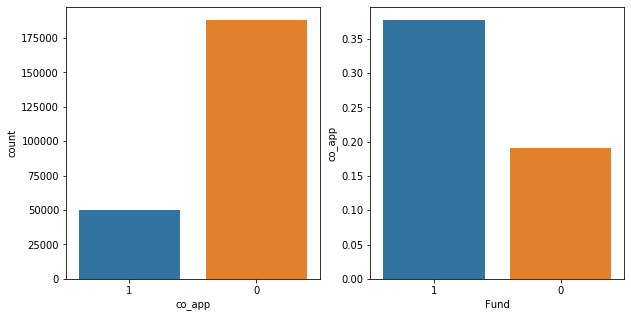

In [ ]:
# plot 2 barplots, 1 showing total counts, 1 showing co app percent by fund
fig, (axis1,axis2) = plt.subplots(1,2, sharex=True, figsize=(10,5))

# countplot for co app, order=[1,0]
sns.countplot(x='co_app', data=fplus_df, order=[1,0], ax=axis1)

# Get co-app Perc for Fund vs Not Fund --- *as_index=False*
co_app_perc = fplus_df[['co_app', 'Fund']].groupby(['Fund'], as_index=False).mean()
# barplot x Fund y = co app 
sns.barplot(x='Fund', y='co_app', data=co_app_perc, order=[1,0], ax=axis2)

In [ ]:
co_app_perc = fplus_df[['co_app', 'Fund']].groupby(['Fund'], as_index=False).mean()

In [ ]:
co_app_perc

,Fund,co_app
0,0,0.190990
1,1,0.377472


In [ ]:
fund_rate_coapp = fplus_df[['co_app', 'Fund']].groupby(['co_app'], as_index=False).mean()
fund_rate_coapp

,co_app,Fund
0,0,0.080113
1,1,0.182796


Text(0, 0.5, 'Percent Fund')

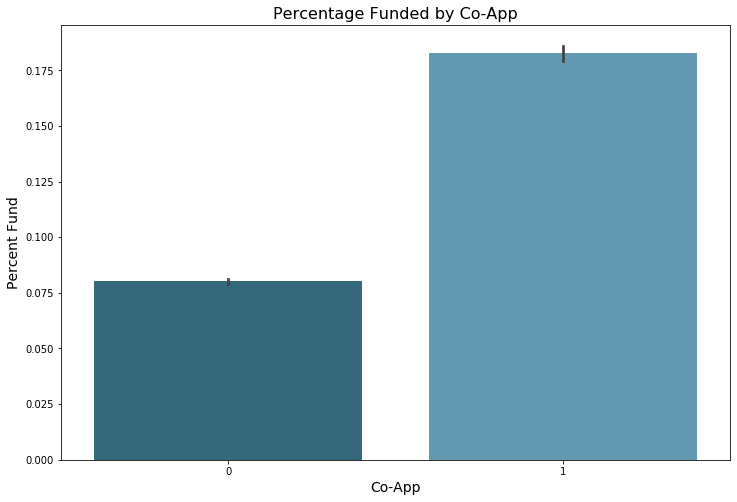

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot('co_app', 'Fund', data=fplus_df, palette='PuBuGn_d')
plt.title('Percentage Funded by Co-App', fontsize=16)
plt.xlabel('Co-App', fontsize=14)
plt.ylabel('Percent Fund', fontsize=14)

## 2) - Loan to Income (LTI)

### View Data

In [ ]:
# drop na for lti and view distribution
loan_income = fplus_df.dropna(subset=['lti__c'])

In [ ]:
# view summary stats
loan_income['lti__c'].describe()

count    235974.000000
mean         21.779849
std         134.979170
min           0.000000
25%          14.400000
50%          20.000000
75%          27.600000
max       55555.600000
Name: lti__c, dtype: float64

### Plot Data

[Text(0.5, 0, '')]

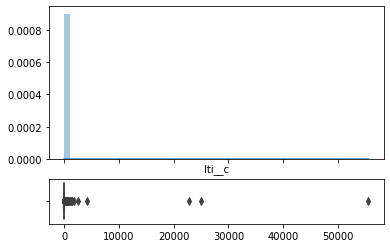

In [ ]:
# Cut the window in 2 parts
f, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.85, .25)})

# Add a graph in each part
sns.boxplot(loan_income['lti__c'], ax=ax_box)
sns.distplot(loan_income['lti__c'], ax=ax_hist)

# Remove x axis name for the boxplot
ax_box.set(xlabel='')

### Remove Outliers

Less than 1 and greater than 45 we will remove

In [ ]:
loan_income[loan_income['lti__c'] > 45].count()

id                                    1311
co_app_verifiable_annual_income__c     471
loan_use__c                           1310
employment_status__c                  1310
amount_of_loan_requested__c           1311
fico__c                               1193
lti__c                                1311
bcc0300__c                            1193
ndi_ratio__c                          1193
utm_source__c                         1311
Fund                                  1311
co_app                                1311
dtype: int64

In [ ]:
loan_income[loan_income['lti__c'] < 1].count()

id                                    837
co_app_verifiable_annual_income__c     96
loan_use__c                           837
employment_status__c                  837
amount_of_loan_requested__c           837
fico__c                               836
lti__c                                837
bcc0300__c                            836
ndi_ratio__c                          836
utm_source__c                         837
Fund                                  837
co_app                                837
dtype: int64

In [ ]:
## remove outlier...
loan_income = loan_income[loan_income['lti__c'] < 45]
loan_income = loan_income[loan_income['lti__c'] >= 1]

[Text(0.5, 0, '')]

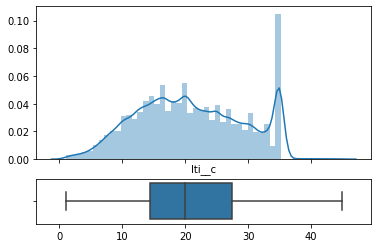

In [ ]:
# Cut the window in 2 parts
f, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.85, .25)})

# Add a graph in each part
sns.boxplot(loan_income['lti__c'], ax=ax_box)
sns.distplot(loan_income['lti__c'], ax=ax_hist)

# Remove x axis name for the boxplot
ax_box.set(xlabel='')

## Filter out bad data in full dataset

In [ ]:
fplus_df = fplus_df[fplus_df['lti__c'] < 45]
fplus_df = fplus_df[fplus_df['lti__c'] >= 1]

## 3) - Marketing Channel (utm_source)

### View Data

In [ ]:
# get counts
fplus_df['utm_source__c'].value_counts()
print(fplus_df['utm_source__c'].value_counts().to_string())

Lending Tree              155038
Quinstreet                 24195
FDR                         6715
ibm                         5111
credible                    4985
crowdnetic                  4938
Phone                       3363
even                        2844
aff_dcg                     2457
website                     2343
dm                          2313
ck                          2202
Rescue                      1965
monevo                      1824
google                      1360
experian                    1093
yahoo                        972
organic                      826
Direct Mail                  819
Direct                       714
nerdwallet                   690
Reload                       641
115                          635
Personalloanpro              526
save                         391
DirectMailWF                 339
msn                          332
CS Phone                     326
aff_ldr                      316
nerd                         279
sfl       

In [ ]:
# get percentages of sources
fplus_df['utm_source__c'].value_counts()/len(fplus_df)

Lending Tree    0.655882
Quinstreet      0.103577
FDR             0.029029
ibm             0.021674
credible        0.021049
                  ...   
129             0.000004
15              0.000004
240             0.000004
LifeMart        0.000004
Mint            0.000004
Name: utm_source__c, Length: 113, dtype: float64

In [ ]:
# Get co-app Perc for Fund vs Not Fund --- *as_index=False*
utm_source = fplus_df[['utm_source__c', 'Fund']].groupby(['utm_source__c'], as_index=False).mean()
utm_source.sort_values('Fund', ascending=False)

,utm_source__c,Fund
29,BDC,1.0
46,Mint,1.0
105,slh,1.0
95,offerweb,1.0
100,reload,1.0
...,...,...
89,lmb,0.0
75,dn_debt-navigator,0.0
24,240,0.0
76,dn_organic,0.0


In [ ]:
utm_source.sort_values(by=['utm_source__c'])

,utm_source__c,Fund
0,111,0.160000
1,115,0.150915
2,129,0.000000
3,14,0.235294
4,15,0.000000
...,...,...
108,website,0.141847
109,wellness,0.000000
110,wf_facebook,0.000000
111,wf_google,0.093023


##### Cross Tab

In [ ]:
cm = sns.light_palette("blue", as_cmap=True)
pd.crosstab(fplus_df['utm_source__c'], fplus_df['Fund'], margins=True, margins_name='Total').style.background_gradient(cmap = cm)

Fund,0,1,Total
utm_source__c,,,
111,21,4,25
115,536,99,635
129,1,0,1
14,100,32,132
15,1,0,1
156,27,5,32
167,40,12,52
17,2,1,3
171,28,2,30


#### Pivot Table

In [ ]:
def fund_rate(x):
  return np.sum(x)/ np.size(x)


print(pd.pivot_table(fplus_df, values='Fund', index='utm_source__c', aggfunc={'Fund': [np.sum, np.size, fund_rate]}).to_string())

                        fund_rate      size      sum
utm_source__c                                       
111                      0.160000      25.0      4.0
115                      0.155906     635.0     99.0
129                      0.000000       1.0      0.0
14                       0.242424     132.0     32.0
15                       0.000000       1.0      0.0
156                      0.156250      32.0      5.0
167                      0.230769      52.0     12.0
17                       0.333333       3.0      1.0
171                      0.066667      30.0      2.0
173                      0.205882      34.0      7.0
18                       0.000000       6.0      0.0
19                       0.000000      12.0      0.0
196                      0.375000       8.0      3.0
20                       0.246914      81.0     20.0
201                      0.139442     251.0     35.0
203                      0.178571      56.0     10.0
212                      0.000000       2.0   

## 4) - FICO

## 5) - Employment

## 6) - Debt to Income (NDI)

## 7) - Debt to Income Squared

## 8) - Loan Use

## 9) - Bank Card Trades (bcc0300)

## 10) - Loan Amount